In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("BA_reviews.csv")
df.head()

,Unnamed: 0,reviews
0,0,✅ Trip Verified | If you can’t fly First Class...
1,1,Not Verified | Singapore to Heathrow. Busine...
2,2,Not Verified | I reported my damaged/ruined ...
3,3,"Not Verified | On March 1st, I flew from Ber..."
4,4,Not Verified | The WORST customer experience! ...


In [3]:
df.drop('Unnamed: 0',axis = 1, inplace = True)

In [4]:
df

,reviews
0,✅ Trip Verified | If you can’t fly First Class...
1,Not Verified | Singapore to Heathrow. Busine...
2,Not Verified | I reported my damaged/ruined ...
3,"Not Verified | On March 1st, I flew from Ber..."
4,Not Verified | The WORST customer experience! ...
...,...
2495,"Sydney to London Heathrow via Singapore, and o..."
2496,Flew Edinburgh to San Francisco via Heathrow o...
2497,Gatwick to Punta Cana with British Airways. Fl...
2498,British Airways flight from London to Singapor...


In [5]:
df.reviews = df.reviews.str.split('|',expand = True)[1]
df

,reviews
0,If you can’t fly First Class don’t fly Britis...
1,Singapore to Heathrow. Business class on an...
2,I reported my damaged/ruined suitcase 5 wee...
3,"On March 1st, I flew from Berlin to São Pau..."
4,The WORST customer experience! British Airway...
...,...
2495,None
2496,None
2497,None
2498,None


In [6]:
df.isnull().sum()

reviews    199
dtype: int64

In [7]:
df.dropna(inplace = True)

In [8]:
df

,reviews
0,If you can’t fly First Class don’t fly Britis...
1,Singapore to Heathrow. Business class on an...
2,I reported my damaged/ruined suitcase 5 wee...
3,"On March 1st, I flew from Berlin to São Pau..."
4,The WORST customer experience! British Airway...
...,...
2469,Istanbul to London Heathrow with British Air...
2470,London Heathrow to Houston on British Airway...
2471,We have flown with British Airways over 100 ...
2472,British Airways from Seattle to Johannesburg...


In [9]:
df = df.iloc[:-301]
df

,reviews
0,If you can’t fly First Class don’t fly Britis...
1,Singapore to Heathrow. Business class on an...
2,I reported my damaged/ruined suitcase 5 wee...
3,"On March 1st, I flew from Berlin to São Pau..."
4,The WORST customer experience! British Airway...
...,...
1996,Flew British Airways from Miami to London He...
1997,"London Heathrow to Dubai, and a delayed flig..."
1998,Never again! Booked a round trip from to Lon...
1999,Not fair for the fare. Flew Bangkok to Paris ...


In [15]:
import re
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
import nltk

In [16]:
# Download stopwords and other necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...


True

In [17]:
# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [18]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Tokenize text
    tokens = word_tokenize(text)
    
    # Remove stopwords and lemmatize tokens
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    
    # Join tokens back into a single string
    return ' '.join(tokens)

# Apply the preprocessing function to your reviews column
df['clean_reviews'] = df['reviews'].apply(preprocess_text)

C:\Users\DELL\AppData\Local\Temp\ipykernel_5052\3857820729.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_reviews'] = df['reviews'].apply(preprocess_text)


In [20]:
df

,reviews,clean_reviews
0,If you can’t fly First Class don’t fly Britis...,’ fly first class ’ fly british airway uncomfo...
1,Singapore to Heathrow. Business class on an...,singapore heathrow business class premium econ...
2,I reported my damaged/ruined suitcase 5 wee...,reported damagedruined suitcase week ago im st...
3,"On March 1st, I flew from Berlin to São Pau...",march st flew berlin são paulo ba encountered ...
4,The WORST customer experience! British Airway...,worst customer experience british airway ba ef...
...,...,...
1996,Flew British Airways from Miami to London He...,flew british airway miami london heathrow th j...
1997,"London Heathrow to Dubai, and a delayed flig...",london heathrow dubai delayed flight poor comm...
1998,Never again! Booked a round trip from to Lon...,never booked round trip london paris return br...
1999,Not fair for the fare. Flew Bangkok to Paris ...,fair fare flew bangkok paris via london britis...


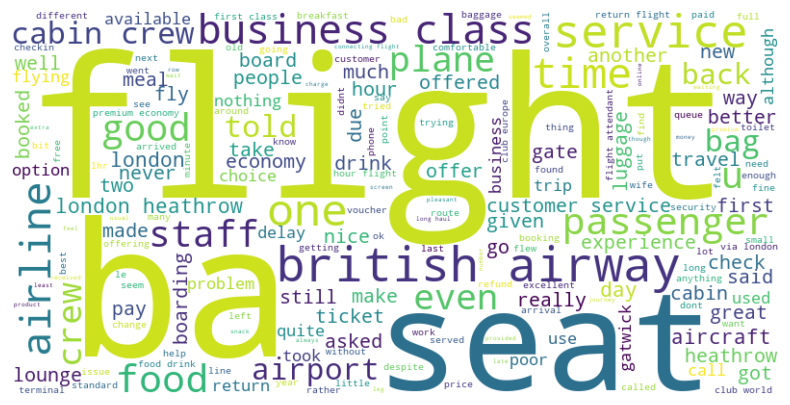

In [21]:
# Combine all cleaned reviews into a single string
text = ' '.join(review for review in df.clean_reviews)

# Create and display the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [28]:
from collections import Counter
# Combine all cleaned reviews into a single string
all_text = ' '.join(review for review in df.clean_reviews)

# Split the combined text into words
words = all_text.split()

# Count the frequency of each word
word_freq = Counter(words)

# Convert to a DataFrame for easier plotting
word_freq_df = pd.DataFrame(word_freq.items(), columns=['Word', 'Frequency'])

# Sort the DataFrame by frequency in descending order
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False).reset_index(drop=True)

# Display the top 10 most frequent words
print(word_freq_df.head(15))

       Word  Frequency
0    flight       4457
1        ba       2809
2      seat       2086
3   service       1679
4    london       1384
5      time       1286
6      food       1150
7      crew       1120
8   airline       1099
9      hour       1093
10    class       1034
11  british       1001
12   airway        993
13    cabin        972
14     good        928


C:\Users\DELL\AppData\Local\Temp\ipykernel_5052\4287032546.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Frequency', x='Word', data=word_freq_df.head(15), palette='viridis')


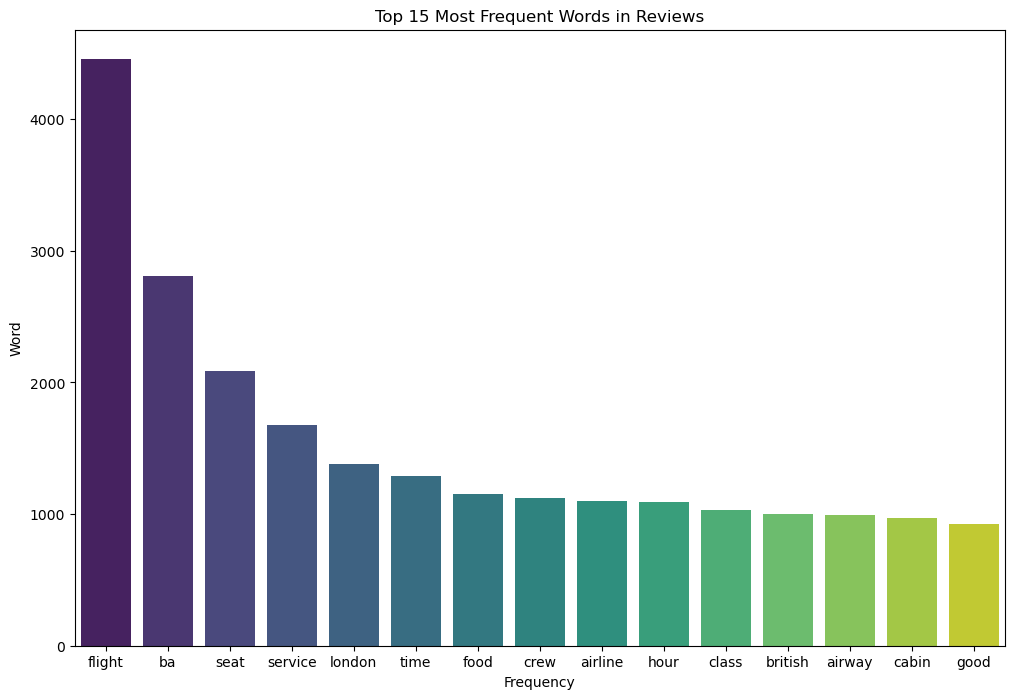

In [29]:
# Plot the top 20 most frequent words
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.barplot(y='Frequency', x='Word', data=word_freq_df.head(15), palette='viridis')
plt.title('Top 15 Most Frequent Words in Reviews')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

In [30]:
# Function to get the sentiment of a review
def get_sentiment(review):
    analysis = TextBlob(review)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the sentiment function to each review
df['Sentiment'] = df.clean_reviews.apply(get_sentiment)

C:\Users\DELL\AppData\Local\Temp\ipykernel_5052\1162538738.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentiment'] = df.clean_reviews.apply(get_sentiment)


In [31]:
df

,reviews,clean_reviews,Sentiment
0,If you can’t fly First Class don’t fly Britis...,’ fly first class ’ fly british airway uncomfo...,Negative
1,Singapore to Heathrow. Business class on an...,singapore heathrow business class premium econ...,Negative
2,I reported my damaged/ruined suitcase 5 wee...,reported damagedruined suitcase week ago im st...,Negative
3,"On March 1st, I flew from Berlin to São Pau...",march st flew berlin são paulo ba encountered ...,Negative
4,The WORST customer experience! British Airway...,worst customer experience british airway ba ef...,Positive
...,...,...,...
1996,Flew British Airways from Miami to London He...,flew british airway miami london heathrow th j...,Negative
1997,"London Heathrow to Dubai, and a delayed flig...",london heathrow dubai delayed flight poor comm...,Negative
1998,Never again! Booked a round trip from to Lon...,never booked round trip london paris return br...,Negative
1999,Not fair for the fare. Flew Bangkok to Paris ...,fair fare flew bangkok paris via london britis...,Negative


In [35]:
df['Sentiment'].value_counts()

Sentiment
Positive    1302
Negative     676
Neutral       22
Name: count, dtype: int64

C:\Users\DELL\AppData\Local\Temp\ipykernel_5052\3800530507.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=sentiment_counts.values, x=sentiment_counts.index, palette='viridis')


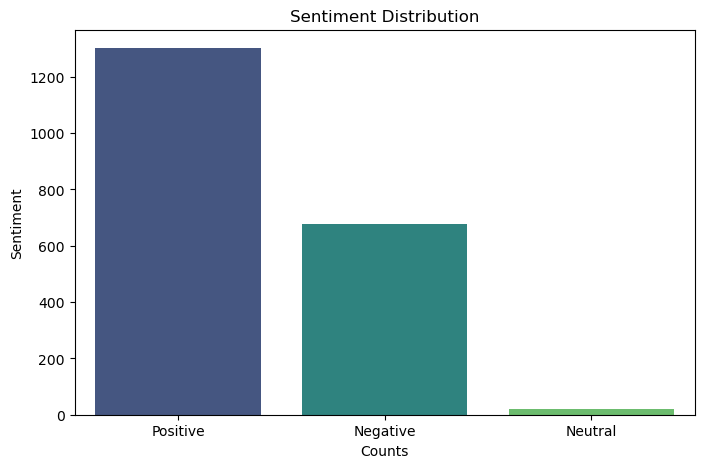

In [33]:
# Plot sentiment distribution
sentiment_counts = df.Sentiment.value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(y=sentiment_counts.values, x=sentiment_counts.index, palette='viridis')
plt.xlabel('Counts')
plt.ylabel('Sentiment')
plt.title('Sentiment Distribution')
plt.show()

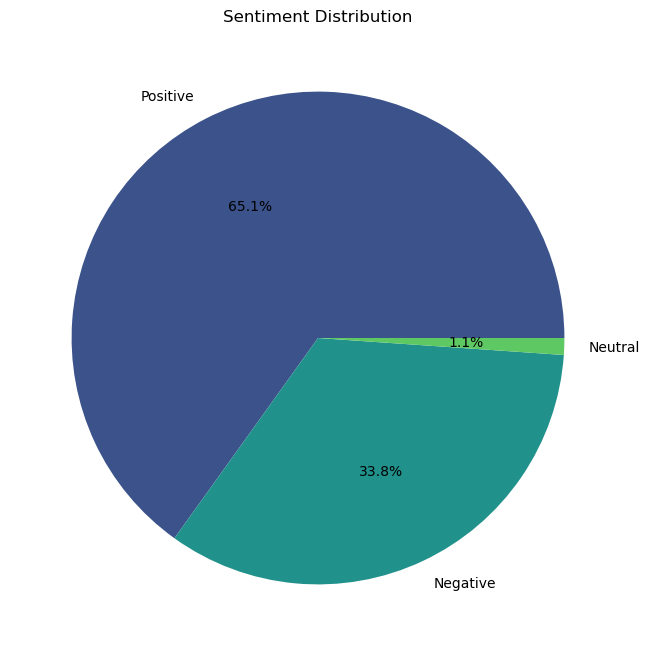

In [34]:
# Plot sentiment distribution as a pie chart
sentiment_counts = df.Sentiment.value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', n_colors=len(sentiment_counts)))
plt.title('Sentiment Distribution')
plt.show()